# EDA Height by Country and prediction
---
In this notebook I'll pratice my skill to explore the data and create clustering model to profile each country.

## Import modules

In [1]:
# Core
import sys
import pandas as pd
import numpy as np
import os

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading input file

In [2]:
# Path of file to read
path = os.getcwd()

# Load data into pandas Dataframe
data = pd.read_csv(os.path.join(path, 'Height of Male and Female by Country 2022.csv'))

---
## Explor the data
We first explore the data to make sense of them mainly we will be looking at:
1. Understanding data and its type
2. Check for missing or null
3. Find potential outliers
4. Find correlations
5. Check for data skew

### Prelim observations

In [3]:
data.head()

,Rank,Country Name,Male Height in Cm,Female Height in Cm,Male Height in Ft,Female Height in Ft
0,1,Netherlands,183.78,170.36,6.03,5.59
1,2,Montenegro,183.30,169.96,6.01,5.58
2,3,Estonia,182.79,168.66,6.00,5.53
3,4,Bosnia and Herzegovina,182.47,167.47,5.99,5.49
4,5,Iceland,182.10,168.91,5.97,5.54


In [4]:
print(data.shape)
print(data.info())

(199, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 199 non-null    int64  
 1   Country Name         199 non-null    object 
 2   Male Height in Cm    199 non-null    float64
 3   Female Height in Cm  199 non-null    float64
 4   Male Height in Ft    199 non-null    float64
 5   Female Height in Ft  199 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB
None


Let's start to see what contain in this dataset.
It's contain `6 rows` with `199 columns` seperated into 5 numerical type and 1 category type.
* Rank **int64**  - Look like rank of country based on sum of average height of both genders.
* Country Name **object** - Name of country
* Male Height in Cm **float64** - Average male height in cm
* Female Height in Cm **float64** - Average female height in cm
* Male Height in Ft **float64** - Average male height in ft
* Female Height in Ft **float64** - Average female height in ft


In [5]:
data.nunique().sort_values(ascending=False)

Rank                   199
Country Name           199
Male Height in Cm      187
Female Height in Cm    181
Male Height in Ft       60
Female Height in Ft     55
dtype: int64

There shouldn't be any missing value but let's check to make sure

In [6]:
data.isnull().sum()

Rank                   0
Country Name           0
Male Height in Cm      0
Female Height in Cm    0
Male Height in Ft      0
Female Height in Ft    0
dtype: int64

---
## Numerical columns within dataset

Let's start looking at numerical dataset.

In [7]:
# List of numerical attributes
num_att = data.select_dtypes(exclude=['object'])
print(num_att.columns)
print(len(num_att.columns))

Index(['Rank', 'Male Height in Cm', 'Female Height in Cm', 'Male Height in Ft',
       'Female Height in Ft'],
      dtype='object')
5


In [8]:
num_att.describe()

,Rank,Male Height in Cm,Female Height in Cm,Male Height in Ft,Female Height in Ft
count,199.000000,199.000000,199.000000,199.000000,199.000000
mean,100.000000,173.089045,160.942915,5.678794,5.280402
std,57.590508,4.949832,4.076377,0.162510,0.133870
min,1.000000,160.130000,150.910000,5.250000,4.950000
25%,50.500000,169.490000,158.240000,5.560000,5.190000
50%,100.000000,173.530000,160.620000,5.690000,5.270000
75%,149.500000,176.510000,163.870000,5.790000,5.375000
max,199.000000,183.780000,170.360000,6.030000,5.590000


Interesting to see global mean height of male is 173 cm and female is 160.9.
This of course hard to tell the details as data is very limit.
*Note: look into <a href="https://ourworldindata.org/human-height">this site</a>  to see if we can find more detail.*

## Categorical columns within the dataset
Let's follow by looking at categorical column(s).

In [9]:
# List of categorical attributes
cat_att = data.select_dtypes(include=['object'])
print(cat_att.columns)
print(len(cat_att.columns))

Index(['Country Name'], dtype='object')
1


In [10]:
cat_att.describe()

,Country Name
count,199
unique,199
top,Netherlands
freq,1


It's good to confirm that our initial look at data is correct.

---
## Data Visualization

<Figure size 576x576 with 0 Axes>

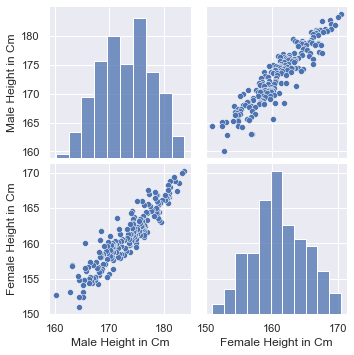

In [11]:
# Set color for seaborn
sns.set(color_codes=True)
# Plotting
To_Plot = ['Male Height in Cm', 'Female Height in Cm']
plt.figure(figsize=(8,8))
sns.pairplot(data[To_Plot])
plt.show()

Nothing interesting this does suggest that country with high average male height will have high average female height also.

## Asses Correlations

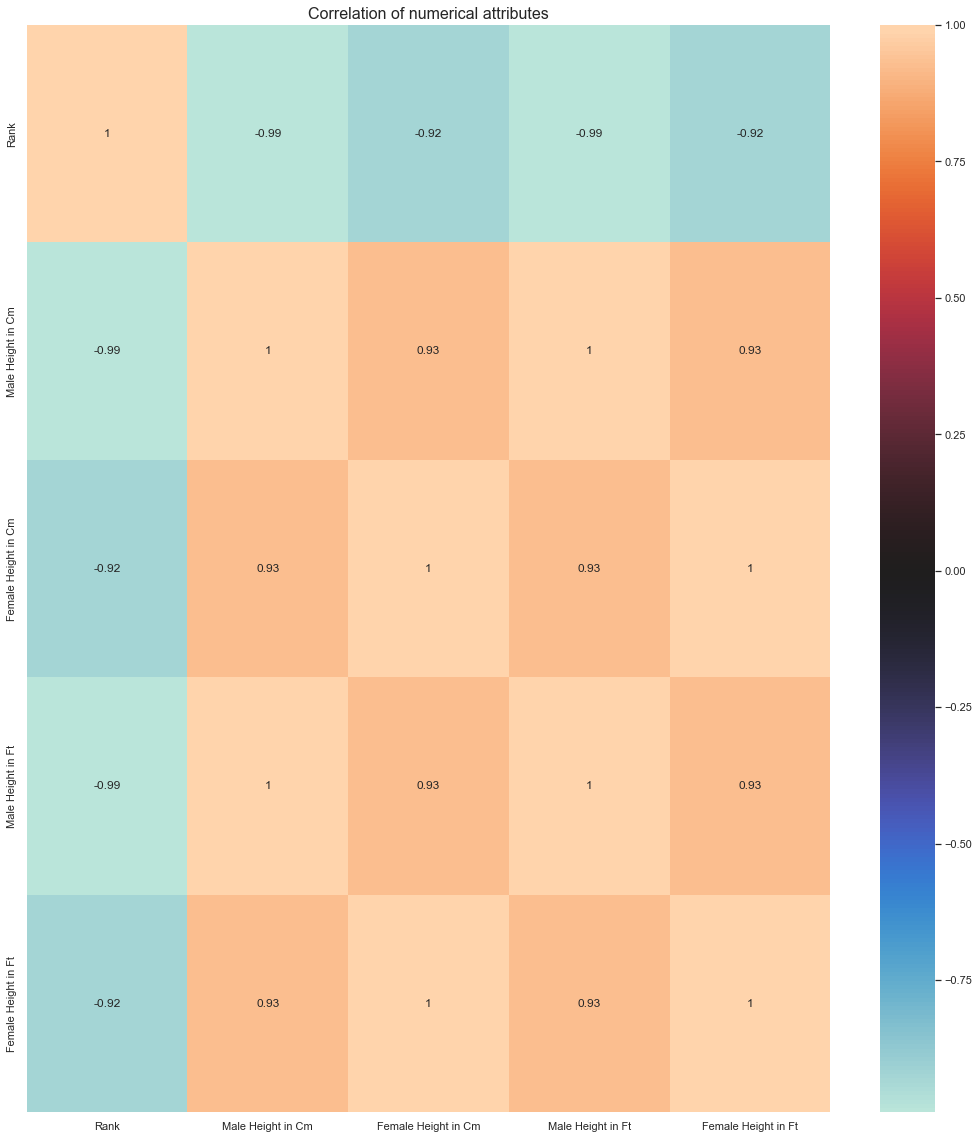

In [12]:
correlation = data.corr()
f, ax = plt.subplots(figsize=(18,20))
plt.title('Correlation of numerical attributes', size=16)
sns.heatmap(correlation, annot=True, center=0)
plt.show()

This confirm that male and female height is highly collated to one another. Another interesting note is that rank is not have much power which make sense. I will drop Ft columns as I will using cm and drop rank as well.

In [13]:
# Copy data before drop columns
data1 = data.copy()
# Drop Ft and rank columns
To_Drop = ['Rank', 'Male Height in Ft', 'Female Height in Ft']
data1 = data1.drop(To_Drop, axis=1)

In [14]:
data1.head()

,Country Name,Male Height in Cm,Female Height in Cm
0,Netherlands,183.78,170.36
1,Montenegro,183.30,169.96
2,Estonia,182.79,168.66
3,Bosnia and Herzegovina,182.47,167.47
4,Iceland,182.10,168.91


---
## Features Engineering

I will create more feature based on the information we have:
* Ratio height between female and male.
* Continent group
* Region group ( South-east Asia, East Europe etc.)

In [15]:
## Create ratio feature
data1['Female/Male Ratio'] = (data1['Female Height in Cm'] / data1['Male Height in Cm']).round(4)

## Create Continent group


data1.head()

,Country Name,Male Height in Cm,Female Height in Cm,Female/Male Ratio
0,Netherlands,183.78,170.36,0.9270
1,Montenegro,183.30,169.96,0.9272
2,Estonia,182.79,168.66,0.9227
3,Bosnia and Herzegovina,182.47,167.47,0.9178
4,Iceland,182.10,168.91,0.9276


For continent and region group there are many way to do so. We can manaully input them based on country name. There is also a better way by using `pycountry_convert` library which is a very good library dealing with country. *For more information <a href="https://pypi.org/project/pycountry-convert/">documentation</a>.*


In [16]:
## We need to install pycountry_convert, pycountry first 
# For kaggle make sure to enable internet connection
!{sys.executable} -m pip install pycountry_convert
!{sys.executable} -m pip install pycountry

You should consider upgrading via the 'C:\Users\Administrator\AppData\Local\Programs\Python\Python37\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\Administrator\AppData\Local\Programs\Python\Python37\python.exe -m pip install --upgrade pip' command.


In [17]:
# Import pycountry_convert library
import pycountry_convert as pc

We have to make sure country name is correct format if we want to use `pc`. Another useful library is `pycountry`.

In [18]:
# Import pycountry library
import pycountry

In [19]:
# Get a list of country name.
input_country_list = list(data1['Country Name'])
# Convert to upper for checking
input_country_list = [element.upper() for element in input_country_list] ; 

In [20]:
# Function to check country name based on input_country_list
def country_name_check():
    pycntrylst = list(pycountry.countries)
    alpha_2 = []
    alpha_3 = []
    name = []
    common_name = []
    official_name = []
    invalid_countrynames =[]
    tobe_deleted = ['IRAN','SOUTH KOREA','NORTH KOREA','SUDAN','MACAU','REPUBLIC OF IRELAND']
    for i in pycntrylst:
        alpha_2.append(i.alpha_2)
        alpha_3.append(i.alpha_3)
        name.append(i.name)
        if hasattr(i, "common_name"):
            common_name.append(i.common_name)
        else:
            common_name.append("")
        if hasattr(i, "official_name"):
            official_name.append(i.official_name)
        else:
            official_name.append("")
    for j in input_country_list:
        if j not in map(str.upper,alpha_2) and j not in map(str.upper,alpha_3) and j not in map(str.upper,name) and j not in map(str.upper,common_name) and j not in map(str.upper,official_name):
            invalid_countrynames.append(j)
    invalid_countrynames = list(set(invalid_countrynames))
    invalid_countrynames = [item for item in invalid_countrynames if item not in tobe_deleted]
    return print(invalid_countrynames)

In [21]:
country_name_check()

['PALESTINE', 'IVORY COAST', 'RUSSIA', 'LAOS', 'SYRIA', 'BRUNEI', 'DR CONGO', 'MICRONESIA']


I will use another dataset to check country name and region

In [22]:
# Path of file to read
path = os.getcwd()

# Load data into pandas Dataframe
region = pd.read_csv(os.path.join(path, 'all.csv'))

In [23]:
region.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


Based on the list above, I tried a lot of different way to check if country name is correct. The best I get the result is to manually check.
*Note: Do let's me know if there is a better way to check and return correct country name by coding.*

In [24]:
# Check if country in list
#data1['Country Name'].isin(list(region['name']))
# Print country name if false
#print(data1['Country Name'][~data1['Country Name'].isin(list(region['name']))])

Let's work on change country name to match pycountry list and add new feature. (Only DR congo need to be changed from what I check)

In [25]:
round((152.71 / 160.13), 4)

0.9537

In [26]:
# Change country name
data1['Country Name'].replace('DR Congo','Democratic Republic of the Congo', inplace=True)

# Create country code columns
data1['Country Code'] = data1['Country Name'].apply(lambda x: pc.country_name_to_country_alpha2(x, cn_name_format="default"))

# There is some problem with alpha-2 country code of Timor-Leste("TL") not sure what is wrong so we will need to add manually .
mask= data1['Country Code']=='TL' 
data1=data1[~mask]
data1['Country Continent']= data1['Country Code'].apply(lambda x: pc.country_alpha2_to_continent_code(x))

# Manually add Timor-Leste
Timor_Leste = {'Country Name': 'Timor-Leste', 'Male Height in Cm': 160.13, 'Female Height in Cm': 152.71, 'Female/Male Ratio': 0.9537, 'Country Code': 'TL', 'Country Continent': 'AS'}
data1 = data1.append(Timor_Leste, ignore_index= True)


In [27]:
data1.head()

,Country Name,Male Height in Cm,Female Height in Cm,Female/Male Ratio,Country Code,Country Continent
0,Netherlands,183.78,170.36,0.9270,NL,EU
1,Montenegro,183.30,169.96,0.9272,ME,EU
2,Estonia,182.79,168.66,0.9227,EE,EU
3,Bosnia and Herzegovina,182.47,167.47,0.9178,BA,EU
4,Iceland,182.10,168.91,0.9276,IS,EU


In [28]:
data1[data1['Country Name'] == 'Timor-Leste']

,Country Name,Male Height in Cm,Female Height in Cm,Female/Male Ratio,Country Code,Country Continent
198,Timor-Leste,160.13,152.71,0.9537,TL,AS


For region I'll define based on ISO-3166. (Refer to another dataset which is also in kaggle)

In [29]:
## Change region column name
region.rename(columns={'alpha-2':'Country Code'}, inplace=True)
### Merge data1 and region based on data1.alpha-2  to get region.sub-region.
data1 = data1.merge(region[['Country Code', 'sub-region']], how='left', on='Country Code')
data1.head()

,Country Name,Male Height in Cm,Female Height in Cm,Female/Male Ratio,Country Code,Country Continent,sub-region
0,Netherlands,183.78,170.36,0.9270,NL,EU,Western Europe
1,Montenegro,183.30,169.96,0.9272,ME,EU,Southern Europe
2,Estonia,182.79,168.66,0.9227,EE,EU,Northern Europe
3,Bosnia and Herzegovina,182.47,167.47,0.9178,BA,EU,Southern Europe
4,Iceland,182.10,168.91,0.9276,IS,EU,Northern Europe


In [30]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 198
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country Name         199 non-null    object 
 1   Male Height in Cm    199 non-null    float64
 2   Female Height in Cm  199 non-null    float64
 3   Female/Male Ratio    199 non-null    float64
 4   Country Code         199 non-null    object 
 5   Country Continent    199 non-null    object 
 6   sub-region           198 non-null    object 
dtypes: float64(3), object(4)
memory usage: 12.4+ KB


In [31]:
# There appear to be NULL in sub-region so let see Sub-Saharan Africa
print(data1[data1.isnull().any(axis=1)]) 

    Country Name  Male Height in Cm  Female Height in Cm  Female/Male Ratio  \
144      Namibia             169.75               160.26             0.9441   

    Country Code Country Continent sub-region  
144           NA                AF        NaN  


Checking the data it's in `Sub-Saharan Africa` region. Not sure why it's doesn't fill only this columns but let's correct that.

In [32]:
# Fill NA
data1['sub-region'].fillna('Sub-Saharan Africa', inplace=True)

In [33]:
print(data1[data1.isnull().any(axis=1)]) 

Empty DataFrame
Columns: [Country Name, Male Height in Cm, Female Height in Cm, Female/Male Ratio, Country Code, Country Continent, sub-region]
Index: []


In [34]:

### Merge data1 and original data.
data = data.merge(data1[['Country Name', 'Female/Male Ratio', 'Country Code', 'Country Continent', 'sub-region']], how='left', on='Country Name')
data.head()

,Rank,Country Name,Male Height in Cm,Female Height in Cm,Male Height in Ft,Female Height in Ft,Female/Male Ratio,Country Code,Country Continent,sub-region
0,1,Netherlands,183.78,170.36,6.03,5.59,0.9270,NL,EU,Western Europe
1,2,Montenegro,183.30,169.96,6.01,5.58,0.9272,ME,EU,Southern Europe
2,3,Estonia,182.79,168.66,6.00,5.53,0.9227,EE,EU,Northern Europe
3,4,Bosnia and Herzegovina,182.47,167.47,5.99,5.49,0.9178,BA,EU,Southern Europe
4,5,Iceland,182.10,168.91,5.97,5.54,0.9276,IS,EU,Northern Europe


---
## Data Prepocessing

Before we get into model we need to process object/categorical data first.
* Label encoding the categorical features
* Scaling features with standard scaler

In [35]:
## Import library
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer

### Label Encoding

In [36]:
# Get a list of object/categorical data
obj = data1.dtypes == 'object'
categorical_col = obj[obj].index

print("List of object= ", categorical_col)

List of object=  Index(['Country Name', 'Country Code', 'Country Continent', 'sub-region'], dtype='object')


In [37]:
# Label encoding and transform
for i in categorical_col:
    data1[i] = data1[[i]].apply(LabelEncoder().fit_transform)

### Standard Scaler

In [38]:
# Scaling data
scaler = StandardScaler()
scaled_feature = scaler.fit_transform(data1.values)
scaled_df = pd.DataFrame(scaled_feature, index=data1.index, columns=data1.columns)

### Clustering

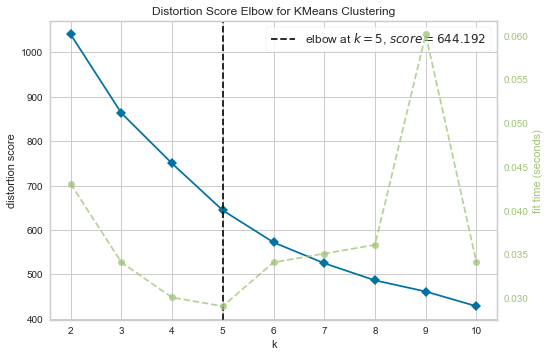

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [39]:
# Using the elbow method to find the optimal number of clusters
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(scaled_df)
Elbow_M.show()

It's appear 5 will be the best number for this data. We will use Agglomerative Clustering to fit data next.

In [40]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=5)
#Fit model and predict clusters
yhat_AC = AC.fit_predict(scaled_df)
scaled_df["Clusters"] = yhat_AC
#Adding the Clusters feature to the original dataframe.
data["Clusters"]= yhat_AC

### Evaluating Model
We are looking for the pattern for this unsupervised clustering.

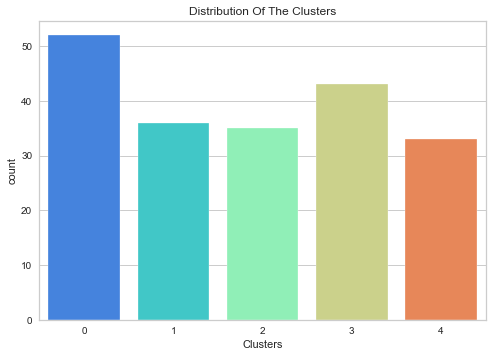

In [41]:
# Look at group distribution
# Plotting countplot of clusters
pl = sns.countplot(x=data["Clusters"], palette="rainbow")
pl.set_title("Distribution Of The Clusters")
plt.show()

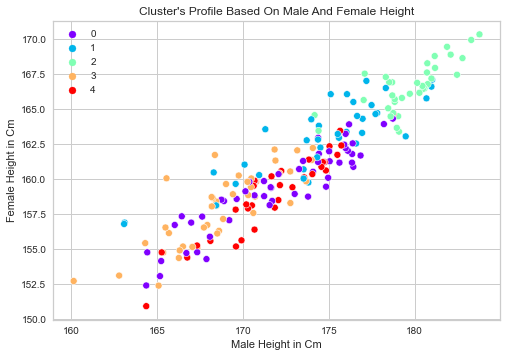

In [42]:
pl = sns.scatterplot(data = data,x=data["Male Height in Cm"], y=data["Female Height in Cm"],hue=data["Clusters"], palette="rainbow")
pl.set_title("Cluster's Profile Based On Male And Female Height")
plt.legend()
plt.show()

In [43]:
data.groupby(['Country Continent', 'sub-region', 'Clusters']).size()

Country Continent  sub-region                       Clusters
AF                 Northern Africa                  0            4
                                                    4            2
                   Sub-Saharan Africa               0           17
                                                    3           28
AS                 Central Asia                     1            3
                                                    4            2
                   Eastern Asia                     1            2
                                                    4            5
                   South-eastern Asia               0            6
                                                    3            5
                   Southern Asia                    0            5
                                                    3            4
                   Western Asia                     0           13
                                                    2            1
 

Now the result is very interesting. Why are there many cluster per sub-region?
We will use `plotly_express` library to help us visualize clusters.

In [49]:
data[data['Clusters'] == 0].sort_values('Country Continent', ascending=False).head()

,Rank,Country Name,Male Height in Cm,Female Height in Cm,Male Height in Ft,Female Height in Ft,Female/Male Ratio,Country Code,Country Continent,sub-region,Clusters
30,31,Switzerland,178.73,164.33,5.86,5.39,0.9194,CH,EU,Western Europe,0
85,86,Portugal,174.37,161.23,5.72,5.29,0.9246,PT,EU,Southern Europe,0
51,52,North Macedonia,176.43,160.88,5.79,5.28,0.9119,MK,EU,Southern Europe,0
83,84,Malta,174.38,162.95,5.72,5.35,0.9345,MT,EU,Southern Europe,0
80,81,Italy,174.42,161.81,5.72,5.31,0.9277,IT,EU,Southern Europe,0


In [44]:
import plotly_express as px

In [47]:
# Replace name
data['Country Name'].replace('DR Congo','Democratic Republic of the Congo', inplace=True)
## Create copy data for visualization
data2 = data.copy()
# As library use alpha-3 for location we need to create another columns
data2['alpha3'] = data2['Country Name'].apply(lambda x: pc.country_name_to_country_alpha3(x))

In [48]:
# Plot
map = px.choropleth(data2, locations='alpha3', color='Clusters', scope='world', title='Cluster World Map')
map.show()

Looking at the map we can see that the clusters is close to each other although some continent have mixed clusters. Let's see each feature.

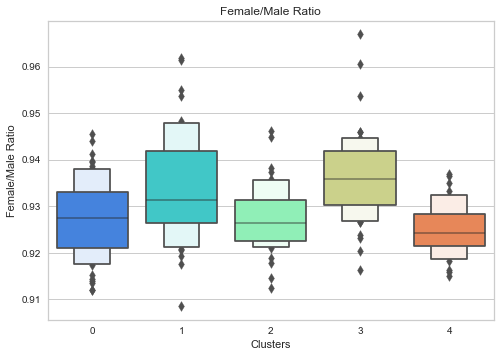

In [50]:
# Plotting the ratio
plt.figure()
pl=sns.boxenplot(y=data2['Female/Male Ratio'],x=data["Clusters"], palette= "rainbow")
pl.set_title("Female/Male Ratio")
plt.show()

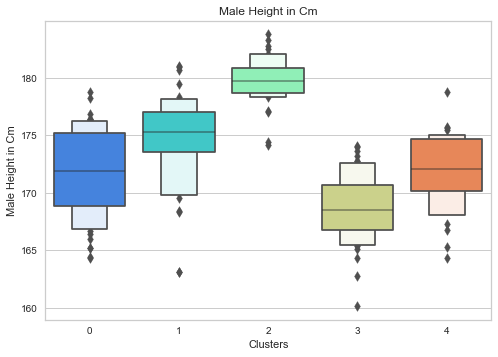

In [51]:
# Plotting the male height
plt.figure()
pl=sns.boxenplot(y=data2['Male Height in Cm'],x=data["Clusters"], palette= "rainbow")
pl.set_title("Male Height in Cm")
plt.show()

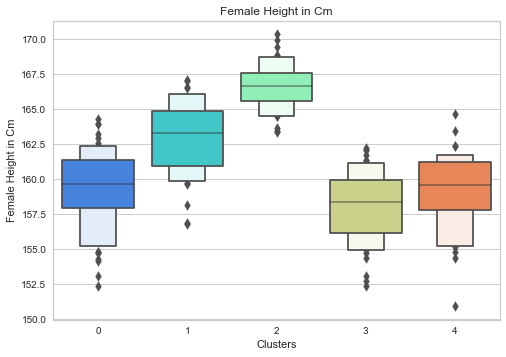

In [53]:
# Plotting the female height
plt.figure()
pl=sns.boxenplot(y=data2['Female Height in Cm'],x=data["Clusters"], palette= "rainbow")
pl.set_title("Female Height in Cm")
plt.show()

From above we can see that:

**Cluster 0**
* Third in average height globally
* Mostly located in Asia


**Cluster 1**
* Seconed in average height globally
* Mostly located in America and Europe

**Cluster 2**
* The highest average height in the world
* Mostly located in America and Europe

**Cluster 3**
* Last in average height globally
* Mostly located in Africa and Asia

**Cluster 4**
* Fourth in average height globally
* Mostly located in Asia

It's very interesting to see what we get from our data.
I do think that we need more data to accurately cluster each group.

Do let's me know if you have any recommendation!